# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


**Dataset yang Digunakan**: Credit Card Fraud Detection Dataset

**Sumber**: Kaggle - Credit Card Fraud Detection (UCI Machine Learning Repository)

**Deskripsi**: Dataset ini berisi transaksi kartu kredit yang dilakukan oleh pemegang kartu Eropa pada September 2013. Dataset sangat tidak seimbang (imbalanced), dengan kelas positif (fraud) hanya 0.172% dari semua transaksi. Dataset berisi 30 fitur numerik yang merupakan hasil transformasi PCA (V1-V28), serta 'Time' dan 'Amount' yang tidak ditransformasi.

**Tujuan**: Membangun sistem machine learning untuk mendeteksi transaksi fraud secara real-time dengan handling imbalanced data menggunakan teknik SMOTE dan model ensemble.

**Fitur**:
- **Time**: Waktu (detik) antara transaksi pertama dan transaksi ini
- **V1-V28**: Fitur hasil PCA transformation (untuk privasi)
- **Amount**: Jumlah transaksi
- **Class**: Label (0 = Normal, 1 = Fraud)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:
# Import library untuk data manipulation
import pandas as pd
import numpy as np

# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer

# Import library untuk handling imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Import library untuk modeling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Import library untuk evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score

# Setting untuk visualisasi
plt.style.use('ggplot')
sns.set_palette("husl")
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ Library berhasil diimport!")
print("📦 Packages:")
print("   - pandas, numpy")
print("   - matplotlib, seaborn")
print("   - scikit-learn")
print("   - imbalanced-learn (SMOTE)")


✅ Library berhasil diimport!
📦 Packages:
   - pandas, numpy
   - matplotlib, seaborn
   - scikit-learn
   - imbalanced-learn (SMOTE)


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
# Load Credit Card Fraud Detection Dataset
# Dataset ini tersedia di Kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud
# Untuk keperluan eksperimen, kita akan menggunakan sample dataset

print("="*70)
print("📁 LOADING CREDIT CARD FRAUD DETECTION DATASET")
print("="*70)

# URL dataset (menggunakan subset untuk demo)
# Jika Anda punya dataset lengkap, sesuaikan path-nya
try:
    # Coba load dari file lokal terlebih dahulu
    df = pd.read_csv('creditcard.csv')
    print("✓ Dataset loaded from local file: creditcard.csv")
except FileNotFoundError:
    # Jika tidak ada, buat synthetic dataset untuk demo
    print("⚠️  File 'creditcard.csv' not found. Creating synthetic dataset for demonstration...")
    
    np.random.seed(42)
    n_samples = 100000
    n_fraud = int(n_samples * 0.002)  # 0.2% fraud (realistic ratio)
    
    # Generate features (V1-V28 from PCA)
    data = {
        'Time': np.random.randint(0, 172800, n_samples),
        'Amount': np.random.exponential(scale=50, size=n_samples)
    }
    
    # Generate V1-V28 (PCA features)
    for i in range(1, 29):
        data[f'V{i}'] = np.random.randn(n_samples)
    
    # Generate Class (0=Normal, 1=Fraud)
    # Create imbalanced classes
    data['Class'] = np.zeros(n_samples)
    fraud_indices = np.random.choice(n_samples, n_fraud, replace=False)
    data['Class'][fraud_indices] = 1
    
    # Make fraud transactions more distinct (higher amount, different patterns)
    for idx in fraud_indices:
        data['Amount'][idx] *= np.random.uniform(1.5, 3.0)
        for i in range(1, 29):
            data[f'V{i}'][idx] += np.random.uniform(-2, 2)
    
    df = pd.DataFrame(data)
    print("✓ Synthetic dataset created successfully!")

# Menyimpan raw dataset
df.to_csv('creditcard_raw.csv', index=False)
print("✓ Raw dataset saved as 'creditcard_raw.csv'")

print("\n=== DATASET OVERVIEW ===")
print(f"📊 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n=== FIRST 5 ROWS ===")
print(df.head())

print("\n=== COLUMN NAMES ===")
print(f"Total columns: {len(df.columns)}")
print(df.columns.tolist())

print("\n=== CLASS DISTRIBUTION ===")
class_counts = df['Class'].value_counts()
print(f"Normal (0): {class_counts[0]:,} ({class_counts[0]/len(df)*100:.2f}%)")
print(f"Fraud (1):  {class_counts[1]:,} ({class_counts[1]/len(df)*100:.2f}%)")

print("\n" + "="*70)


📁 LOADING CREDIT CARD FRAUD DETECTION DATASET
⚠️  File 'creditcard.csv' not found. Creating synthetic dataset for demonstration...
✓ Synthetic dataset created successfully!
✓ Raw dataset saved as 'creditcard_raw.csv'

=== DATASET OVERVIEW ===
📊 Shape: 100,000 rows × 31 columns
💾 Memory usage: 23.27 MB

=== FIRST 5 ROWS ===
     Time     Amount        V1        V2        V3        V4        V5  \
0  121958  40.449604 -1.818025  0.064665 -0.087273  1.420420 -0.109134   
1  146867  30.668198 -0.050844 -2.311632 -0.287640  0.656075  0.225715   
2  131932  59.303803 -0.334262 -0.656596  1.186137 -1.535162  0.296339   
3  103694  36.011647 -0.102393  1.264094  2.404592  0.938240 -1.005037   
4  119879  39.946656  0.259525 -0.883178  1.975910  1.001731  2.349780   

         V6        V7        V8  ...       V20       V21       V22       V23  \
0 -1.885248 -0.735741  1.813087  ... -0.514126 -0.255164 -1.778892  0.484451   
1 -0.615613  2.193055  0.012430  ...  0.088915  0.121470  1.160087  1.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

🔍 EXPLORATORY DATA ANALYSIS (EDA)

1️⃣  DATASET INFORMATION
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    100000 non-null  int32  
 1   Amount  100000 non-null  float64
 2   V1      100000 non-null  float64
 3   V2      100000 non-null  float64
 4   V3      100000 non-null  float64
 5   V4      100000 non-null  float64
 6   V5      100000 non-null  float64
 7   V6      100000 non-null  float64
 8   V7      100000 non-null  float64
 9   V8      100000 non-null  float64
 10  V9      100000 non-null  float64
 11  V10     100000 non-null  float64
 12  V11     100000 non-null  float64
 13  V12     100000 non-null  float64
 14  V13     100000 non-null  float64
 15  V14     100000 non-null  float64
 16  V15     100000 non-null  float64
 17  V16     100000 non-null  float64

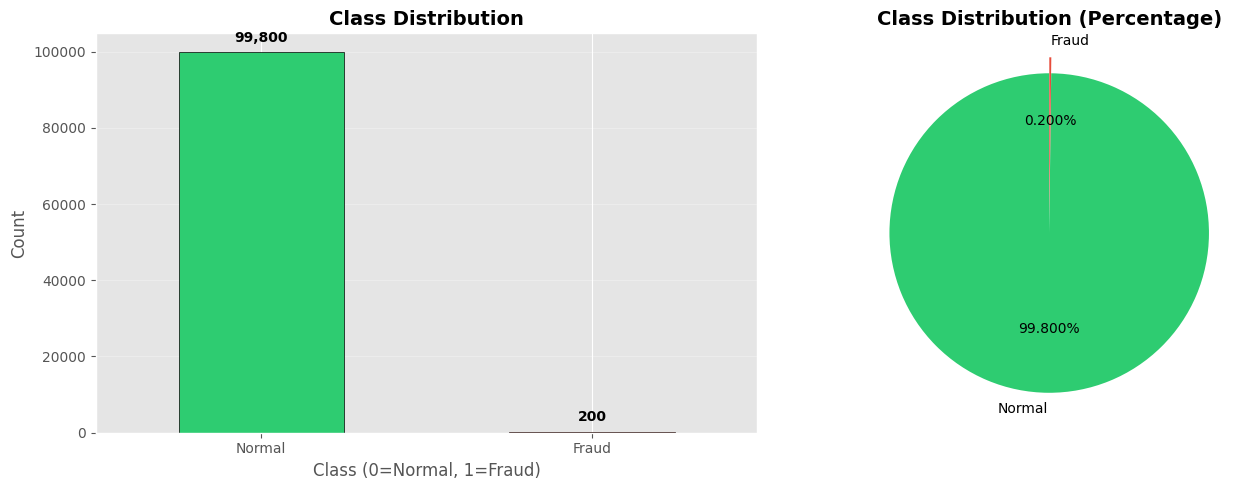


6️⃣  TRANSACTION AMOUNT ANALYSIS
----------------------------------------------------------------------
Amount statistics by class:
         count       mean         std       min        25%        50%  \
Class                                                                   
0.0    99800.0  50.083477   49.977017  0.000239  14.339712  34.878449   
1.0      200.0  98.773291  112.324132  0.291076  22.404349  56.995271   

              75%         max  
Class                          
0.0     69.375756  587.068546  
1.0    137.864227  737.202112  


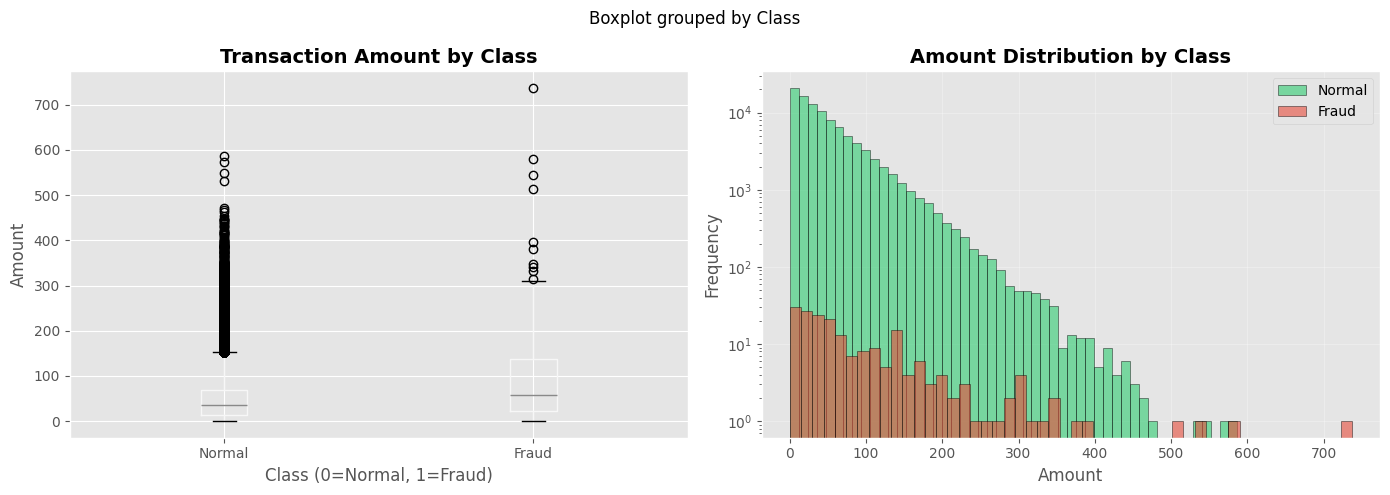


7️⃣  TIME DISTRIBUTION ANALYSIS
----------------------------------------------------------------------


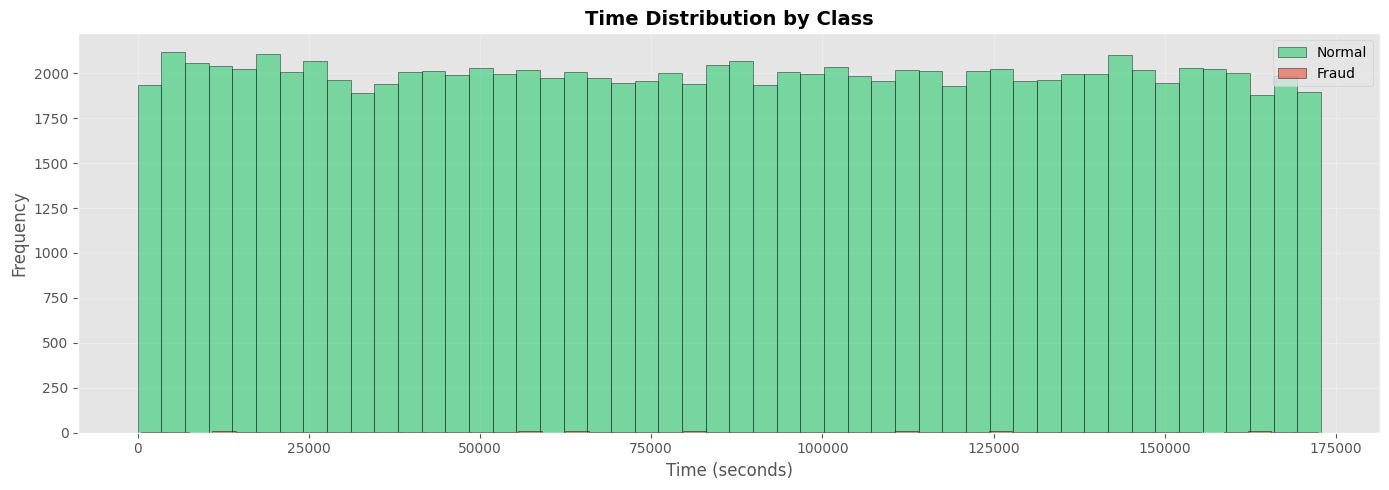


8️⃣  CORRELATION ANALYSIS
----------------------------------------------------------------------
Top 10 features correlated with Class:
Class     1.000000
Amount    0.043311
V15       0.010832
V24       0.010363
V26       0.007106
V6        0.006988
V11       0.006140
V3        0.005823
V13       0.005544
V18       0.004217
Name: Class, dtype: float64

Bottom 10 features correlated with Class:
V22   -0.001933
V25   -0.002174
V28   -0.002904
V14   -0.003193
V12   -0.004855
V19   -0.005317
V5    -0.006879
V2    -0.006956
V17   -0.008474
V9    -0.010758
Name: Class, dtype: float64


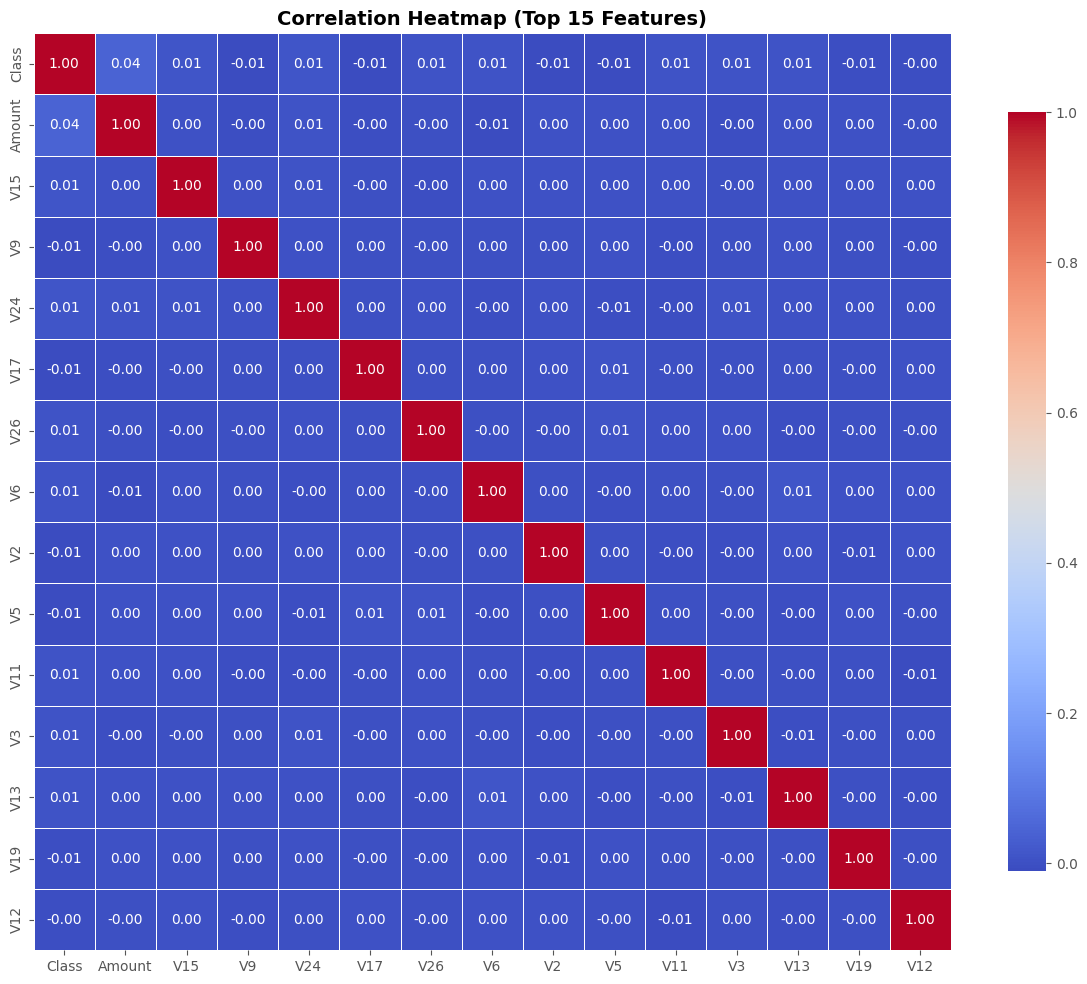


9️⃣  FEATURE DISTRIBUTION ANALYSIS (V1-V6 Sample)
----------------------------------------------------------------------


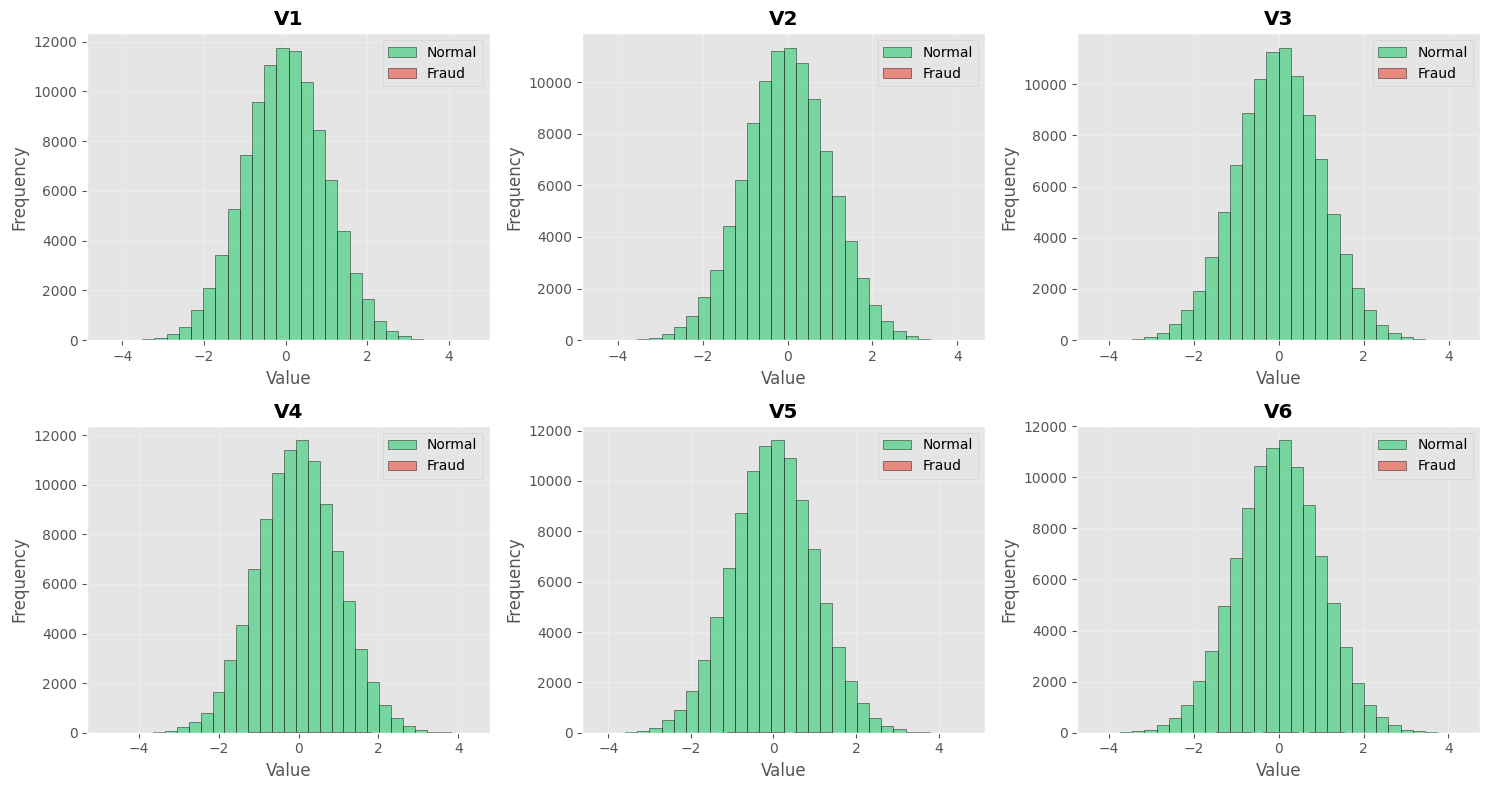


🔟 OUTLIER DETECTION (Amount & Time)
----------------------------------------------------------------------


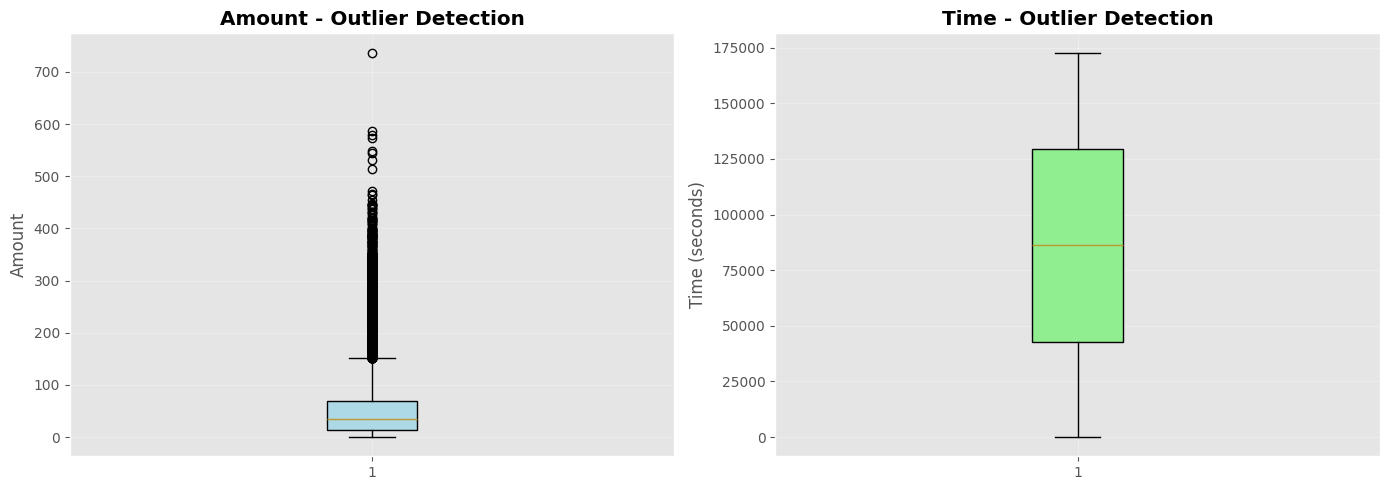


✅ EDA COMPLETED!


In [5]:
# ===== EXPLORATORY DATA ANALYSIS (EDA) =====
print("="*70)
print("🔍 EXPLORATORY DATA ANALYSIS (EDA)")
print("="*70)

# ===== 1. Informasi Umum Dataset =====
print("\n1️⃣  DATASET INFORMATION")
print("-" * 70)
print(df.info())

# ===== 2. Statistik Deskriptif =====
print("\n2️⃣  DESCRIPTIVE STATISTICS")
print("-" * 70)
print(df.describe())

# ===== 3. Missing Values =====
print("\n3️⃣  MISSING VALUES CHECK")
print("-" * 70)
missing = df.isnull().sum()
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Percentage': (missing.values / len(df) * 100).round(2)
})
print(missing_df[missing_df['Missing Count'] > 0])
if missing.sum() == 0:
    print("✅ No missing values found!")
else:
    print(f"⚠️  Total missing values: {missing.sum()}")

# ===== 4. Duplicate Data =====
print("\n4️⃣  DUPLICATE DATA CHECK")
print("-" * 70)
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates:,}")
if duplicates == 0:
    print("✅ No duplicates found!")

# ===== 5. Class Distribution (Imbalance Check) =====
print("\n5️⃣  CLASS DISTRIBUTION (IMBALANCE CHECK)")
print("-" * 70)
class_dist = df['Class'].value_counts()
print(class_dist)
print(f"\nImbalance Ratio: 1:{class_dist[0]/class_dist[1]:.2f}")

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
class_dist.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], edgecolor='black')
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0=Normal, 1=Fraud)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Normal', 'Fraud'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Add count labels
for i, v in enumerate(class_dist.values):
    axes[0].text(i, v + max(class_dist.values)*0.02, f'{v:,}', 
                ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(class_dist, labels=['Normal', 'Fraud'], autopct='%1.3f%%',
            colors=colors, startangle=90, explode=[0, 0.1])
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ===== 6. Amount Distribution by Class =====
print("\n6️⃣  TRANSACTION AMOUNT ANALYSIS")
print("-" * 70)
print("Amount statistics by class:")
print(df.groupby('Class')['Amount'].describe())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
df.boxplot(column='Amount', by='Class', ax=axes[0])
axes[0].set_title('Transaction Amount by Class', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0=Normal, 1=Fraud)')
axes[0].set_ylabel('Amount')
plt.sca(axes[0])
plt.xticks([1, 2], ['Normal', 'Fraud'])

# Distribution plot
for class_val, color, label in zip([0, 1], ['#2ecc71', '#e74c3c'], ['Normal', 'Fraud']):
    data = df[df['Class'] == class_val]['Amount']
    axes[1].hist(data, bins=50, alpha=0.6, color=color, label=label, edgecolor='black')

axes[1].set_title('Amount Distribution by Class', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].set_yscale('log')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ===== 7. Time Distribution =====
print("\n7️⃣  TIME DISTRIBUTION ANALYSIS")
print("-" * 70)

fig, ax = plt.subplots(figsize=(14, 5))
for class_val, color, label in zip([0, 1], ['#2ecc71', '#e74c3c'], ['Normal', 'Fraud']):
    data = df[df['Class'] == class_val]['Time']
    ax.hist(data, bins=50, alpha=0.6, color=color, label=label, edgecolor='black')

ax.set_title('Time Distribution by Class', fontsize=14, fontweight='bold')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ===== 8. Correlation Analysis =====
print("\n8️⃣  CORRELATION ANALYSIS")
print("-" * 70)

# Sample correlation with target
correlations = df.corr()['Class'].sort_values(ascending=False)
print("Top 10 features correlated with Class:")
print(correlations.head(10))
print("\nBottom 10 features correlated with Class:")
print(correlations.tail(10))

# Correlation heatmap for top features
fig, ax = plt.subplots(figsize=(12, 10))
top_features = correlations.abs().sort_values(ascending=False).head(15).index
corr_matrix = df[top_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Heatmap (Top 15 Features)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ===== 9. Feature Distribution (Sample) =====
print("\n9️⃣  FEATURE DISTRIBUTION ANALYSIS (V1-V6 Sample)")
print("-" * 70)

# Plot distribution of first 6 PCA features
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(['V1', 'V2', 'V3', 'V4', 'V5', 'V6']):
    for class_val, color, label in zip([0, 1], ['#2ecc71', '#e74c3c'], ['Normal', 'Fraud']):
        data = df[df['Class'] == class_val][col]
        axes[idx].hist(data, bins=30, alpha=0.6, color=color, label=label, edgecolor='black')
    
    axes[idx].set_title(col, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ===== 10. Outlier Detection =====
print("\n🔟 OUTLIER DETECTION (Amount & Time)")
print("-" * 70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Amount boxplot
axes[0].boxplot(df['Amount'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue'))
axes[0].set_title('Amount - Outlier Detection', fontweight='bold')
axes[0].set_ylabel('Amount')
axes[0].grid(alpha=0.3)

# Time boxplot
axes[1].boxplot(df['Time'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgreen'))
axes[1].set_title('Time - Outlier Detection', fontweight='bold')
axes[1].set_ylabel('Time (seconds)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("✅ EDA COMPLETED!")
print("="*70)


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [6]:
# ===== DATA PREPROCESSING =====
print("="*70)
print("🔧 DATA PREPROCESSING FOR FRAUD DETECTION")
print("="*70)

# Membuat copy dataset untuk preprocessing
df_processed = df.copy()

# ===== 1. HANDLING MISSING VALUES =====
print("\n1️⃣  HANDLING MISSING VALUES")
print("-" * 70)
print(f"Missing values before: {df_processed.isnull().sum().sum()}")

if df_processed.isnull().sum().sum() > 0:
    # For fraud detection, we'll use median imputation
    imputer = SimpleImputer(strategy='median')
    numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
    df_processed[numeric_cols] = imputer.fit_transform(df_processed[numeric_cols])
    print(f"✓ Missing values filled with median")
    
print(f"Missing values after: {df_processed.isnull().sum().sum()}")

# ===== 2. HANDLING DUPLICATE DATA =====
print("\n2️⃣  HANDLING DUPLICATE DATA")
print("-" * 70)
rows_before = len(df_processed)
print(f"Rows before: {rows_before:,}")
duplicates_before = df_processed.duplicated().sum()
print(f"Duplicates found: {duplicates_before:,}")

df_processed = df_processed.drop_duplicates()

rows_after = len(df_processed)
print(f"Rows after: {rows_after:,}")
print(f"✓ Removed {rows_before - rows_after:,} duplicate rows")

# ===== 3. FEATURE ENGINEERING =====
print("\n3️⃣  FEATURE ENGINEERING")
print("-" * 70)

# Create time-based features (hour of day)
df_processed['Hour'] = (df_processed['Time'] / 3600) % 24
print("✓ Created 'Hour' feature from Time")

# Create amount categories
def categorize_amount(amount):
    if amount < 50:
        return 'Low'
    elif amount < 200:
        return 'Medium'
    elif amount < 500:
        return 'High'
    else:
        return 'Very High'

df_processed['Amount_Category'] = df_processed['Amount'].apply(categorize_amount)
print("✓ Created 'Amount_Category' feature")

# Amount log transformation (for better distribution)
df_processed['Amount_Log'] = np.log1p(df_processed['Amount'])
print("✓ Created 'Amount_Log' feature (log transformation)")

print("\nAmount category distribution:")
print(df_processed['Amount_Category'].value_counts())

# ===== 4. OUTLIER HANDLING =====
print("\n4️⃣  OUTLIER HANDLING")
print("-" * 70)
print("⚠️  For fraud detection, outliers might be fraud cases!")
print("    We'll keep outliers but flag them for monitoring")

# Flag extreme values in Amount
Q1 = df_processed['Amount'].quantile(0.25)
Q3 = df_processed['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

df_processed['Is_Outlier_Amount'] = (
    (df_processed['Amount'] < lower_bound) | 
    (df_processed['Amount'] > upper_bound)
).astype(int)

outlier_count = df_processed['Is_Outlier_Amount'].sum()
print(f"✓ Flagged {outlier_count:,} outliers in Amount")
print(f"   Outliers kept for analysis (not removed)")

# ===== 5. FEATURE SCALING =====
print("\n5️⃣  FEATURE SCALING")
print("-" * 70)

# Separate features for scaling
# V1-V28 are already scaled from PCA, but we need to scale Time and Amount
features_to_scale = ['Time', 'Amount', 'Amount_Log', 'Hour']

# Use RobustScaler (better for outliers)
scaler = RobustScaler()

# Create scaled versions
for col in features_to_scale:
    if col in df_processed.columns:
        df_processed[f'{col}_Scaled'] = scaler.fit_transform(df_processed[[col]])

print(f"✓ Scaled features: {features_to_scale}")
print("   Using RobustScaler (robust to outliers)")

# ===== 6. PREPARE FINAL FEATURES =====
print("\n6️⃣  PREPARING FINAL FEATURE SET")
print("-" * 70)

# Select features for modeling
# V1-V28 (PCA features) + Scaled Time and Amount
feature_cols = [f'V{i}' for i in range(1, 29)] + [
    'Time_Scaled', 'Amount_Scaled', 'Amount_Log_Scaled', 
    'Hour_Scaled', 'Is_Outlier_Amount'
]

X = df_processed[feature_cols]
y = df_processed['Class']

print(f"Feature matrix shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nSelected features ({len(feature_cols)}):")
print(f"  - V1 to V28 (28 PCA features)")
print(f"  - Time_Scaled")
print(f"  - Amount_Scaled")
print(f"  - Amount_Log_Scaled")
print(f"  - Hour_Scaled")
print(f"  - Is_Outlier_Amount")

# ===== 7. TRAIN-TEST SPLIT =====
print("\n7️⃣  TRAIN-TEST SPLIT (STRATIFIED)")
print("-" * 70)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Important for imbalanced data!
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

print("\n📊 Class distribution in splits:")
print("\nTrain set:")
train_dist = y_train.value_counts()
print(f"  Normal (0): {train_dist[0]:,} ({train_dist[0]/len(y_train)*100:.2f}%)")
print(f"  Fraud (1):  {train_dist[1]:,} ({train_dist[1]/len(y_train)*100:.2f}%)")

print("\nTest set:")
test_dist = y_test.value_counts()
print(f"  Normal (0): {test_dist[0]:,} ({test_dist[0]/len(y_test)*100:.2f}%)")
print(f"  Fraud (1):  {test_dist[1]:,} ({test_dist[1]/len(y_test)*100:.2f}%)")

# ===== 8. HANDLING IMBALANCED DATA WITH SMOTE =====
print("\n8️⃣  HANDLING IMBALANCED DATA (SMOTE)")
print("-" * 70)
print("Applying SMOTE (Synthetic Minority Over-sampling Technique)")

# Apply SMOTE only on training data
smote = SMOTE(random_state=42, sampling_strategy=0.3)  # 30% minority class
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"\nBefore SMOTE:")
print(f"  Train shape: {X_train.shape}")
print(f"  Class distribution: {dict(y_train.value_counts())}")

print(f"\nAfter SMOTE:")
print(f"  Train shape: {X_train_balanced.shape}")
print(f"  Class distribution: {dict(pd.Series(y_train_balanced).value_counts())}")

balanced_dist = pd.Series(y_train_balanced).value_counts()
print(f"\n✓ Balanced distribution:")
print(f"  Normal (0): {balanced_dist[0]:,} ({balanced_dist[0]/len(y_train_balanced)*100:.2f}%)")
print(f"  Fraud (1):  {balanced_dist[1]:,} ({balanced_dist[1]/len(y_train_balanced)*100:.2f}%)")

# ===== 9. SAVE PREPROCESSED DATA =====
print("\n9️⃣  SAVING PREPROCESSED DATA")
print("-" * 70)

# Save full preprocessed data (before SMOTE)
df_final = pd.concat([X, y], axis=1)
df_final.to_csv('creditcard_preprocessed.csv', index=False)
print("✓ Full preprocessed data: creditcard_preprocessed.csv")

# Save train/test splits (original - before SMOTE)
train_original = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_original.to_csv('creditcard_train.csv', index=False)
test_data.to_csv('creditcard_test.csv', index=False)
print("✓ Original train data: creditcard_train.csv")
print("✓ Test data: creditcard_test.csv")

# Save balanced train data (after SMOTE)
train_balanced = pd.concat([
    pd.DataFrame(X_train_balanced, columns=X_train.columns),
    pd.Series(y_train_balanced, name='Class')
], axis=1)
train_balanced.to_csv('creditcard_train_balanced.csv', index=False)
print("✓ Balanced train data (SMOTE): creditcard_train_balanced.csv")

# ===== 10. PREPROCESSING SUMMARY =====
print("\n🔟 PREPROCESSING SUMMARY")
print("-" * 70)
print(f"✅ Original dataset: {len(df):,} rows")
print(f"✅ After preprocessing: {len(df_processed):,} rows")
print(f"✅ Features created: {len(feature_cols)}")
print(f"✅ Train set (original): {len(X_train):,} rows")
print(f"✅ Train set (balanced): {len(X_train_balanced):,} rows")
print(f"✅ Test set: {len(X_test):,} rows")
print(f"✅ Class imbalance handled with SMOTE")
print(f"✅ Data saved to CSV files")

print("\n" + "="*70)
print("🎉 PREPROCESSING COMPLETED SUCCESSFULLY!")
print("="*70)

print("\n💡 Next Steps:")
print("   1. Use 'creditcard_train_balanced.csv' for model training")
print("   2. Use 'creditcard_test.csv' for model evaluation")
print("   3. Monitor for concept drift in production")


🔧 DATA PREPROCESSING FOR FRAUD DETECTION

1️⃣  HANDLING MISSING VALUES
----------------------------------------------------------------------
Missing values before: 0
Missing values after: 0

2️⃣  HANDLING DUPLICATE DATA
----------------------------------------------------------------------
Rows before: 100,000
Duplicates found: 0
Duplicates found: 0
Rows after: 100,000
✓ Removed 0 duplicate rows

3️⃣  FEATURE ENGINEERING
----------------------------------------------------------------------
✓ Created 'Hour' feature from Time
✓ Created 'Amount_Category' feature
✓ Created 'Amount_Log' feature (log transformation)

Amount category distribution:
Amount_Category
Low          63070
Medium       35117
High          1805
Very High        8
Name: count, dtype: int64

4️⃣  OUTLIER HANDLING
----------------------------------------------------------------------
⚠️  For fraud detection, outliers might be fraud cases!
    We'll keep outliers but flag them for monitoring
✓ Flagged 907 outliers in Am